In [1]:
import pandas as pd
import torch.nn as nn
import torch
import numpy as np
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data

Date        Close         Open         High          Low     PE  \
0     1960-01-04    59.910000    59.910000    59.910000    59.910000  18.34   
1     1960-01-05    60.389999    60.389999    60.389999    60.389999  18.34   
2     1960-01-06    60.130001    60.130001    60.130001    60.130001  18.34   
3     1960-01-07    59.689999    59.689999    59.689999    59.689999  18.34   
4     1960-01-08    59.500000    59.500000    59.500000    59.500000  18.34   
...          ...          ...          ...          ...          ...    ...   
15671 2022-02-11  4418.640000  4506.270000  4526.330000  4401.410000  37.56   
15672 2022-02-14  4401.670000  4412.610000  4426.220000  4364.840000  37.56   
15673 2022-02-15  4471.070000  4429.280000  4472.770000  4429.280000  37.56   
15674 2022-02-16  4475.010000  4455.750000  4489.550000  4429.680000  37.56   
15675 2022-02-17  4380.260000  4456.060000  4456.060000  4373.810000  37.56   

       Ratio  
0      17.12  
1      17.12  
2      17.12  
3      17.12  
4      17.12  
...      ...  
15671  25.93  
15672  25.93  
15673  25.93  
15674  25.93  
15675  25.93  

[15676 rows x 7 columns]

In [3]:
rows = [x for x in data.index if data.loc[x]['Open'] == 0]
data = data.drop(rows, axis=0)

In [4]:
test_data = data.loc[ (data['Date']  >= '1980-01-01' )]
test_data

Date        Close         Open         High          Low     PE  \
5015  1980-01-02   105.760002   107.940002   108.430000   105.290001   8.85   
5016  1980-01-03   105.220001   105.760002   106.080002   103.260002   8.85   
5017  1980-01-04   106.519997   105.220001   107.080002   105.089996   8.85   
5018  1980-01-07   106.809998   106.519997   107.800003   105.800003   8.85   
5019  1980-01-08   108.949997   106.809998   109.290001   106.290001   8.85   
...          ...          ...          ...          ...          ...    ...   
15671 2022-02-11  4418.640000  4506.270000  4526.330000  4401.410000  37.56   
15672 2022-02-14  4401.670000  4412.610000  4426.220000  4364.840000  37.56   
15673 2022-02-15  4471.070000  4429.280000  4472.770000  4429.280000  37.56   
15674 2022-02-16  4475.010000  4455.750000  4489.550000  4429.680000  37.56   
15675 2022-02-17  4380.260000  4456.060000  4456.060000  4373.810000  37.56   

       Ratio  
5015    7.39  
5016    7.39  
5017    7.39  
5018    7.39  
5019    7.39  
...      ...  
15671  25.93  
15672  25.93  
15673  25.93  
15674  25.93  
15675  25.93  

[10625 rows x 7 columns]

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

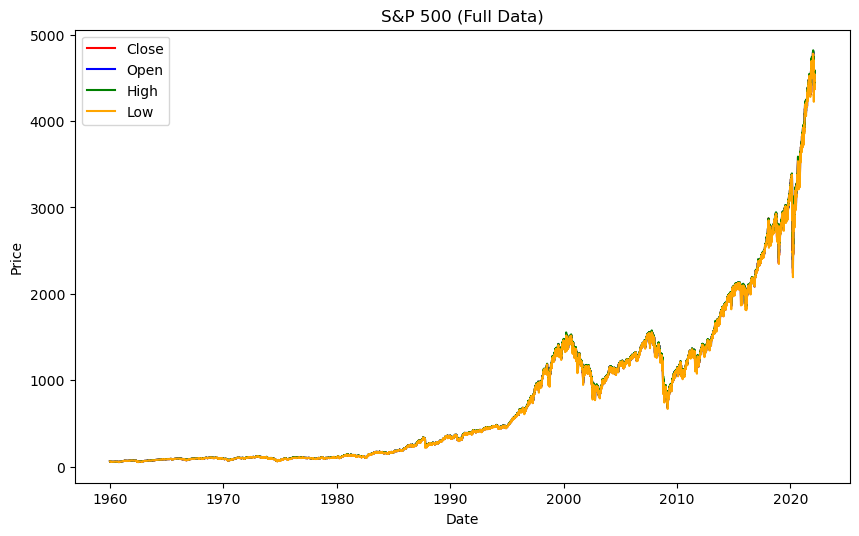

In [5]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values,'red', label = 'Close')
plt.plot(data.Date, data.Open.values, 'blue', label = 'Open')
plt.plot(data.Date, data.High.values, 'green', label = 'High')
plt.plot(data.Date, data.Low.values, 'orange', label = 'Low')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("S&P 500 (Full Data)")
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

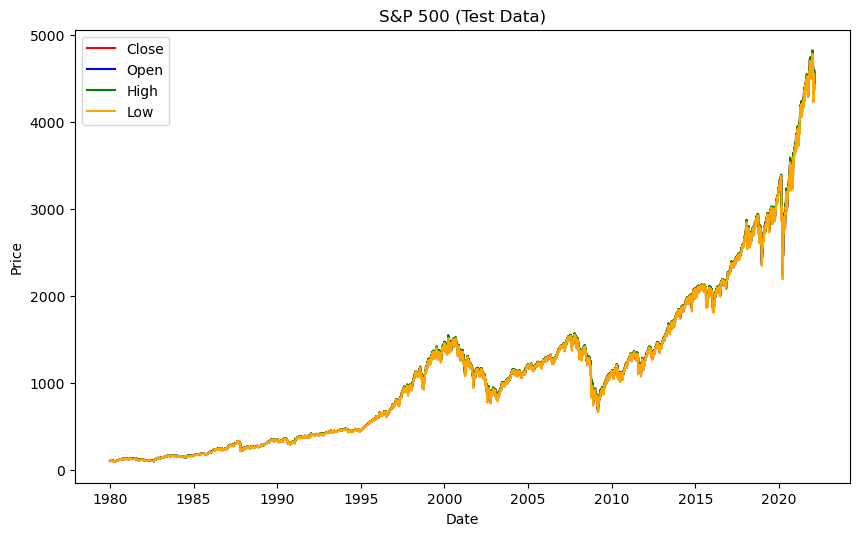

In [6]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(test_data.Date, test_data.Close.values,'red', label = 'Close')
plt.plot(test_data.Date, test_data.Open.values, 'blue', label = 'Open')
plt.plot(test_data.Date, test_data.High.values, 'green', label = 'High')
plt.plot(test_data.Date, test_data.Low.values, 'orange', label = 'Low')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("S&P 500 (Test Data)")
plt

In [7]:
dataset = data[['Close', 'Open', 'High', 'Low']].values
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.00162509, 0.00162237, 0.00161757, 0.00181023],
       [0.00172626, 0.00172337, 0.00171827, 0.00191173],
       [0.00167146, 0.00166866, 0.00166372, 0.00185675],
       ...,
       [0.93139433, 0.92104261, 0.9274403 , 0.92582301],
       [0.93222479, 0.92661253, 0.93096076, 0.9259076 ],
       [0.91225371, 0.92667776, 0.92393453, 0.91409249]])

In [8]:
test_dataset = test_data[['Close', 'Open', 'High', 'Low']].values
test_dataset = scaler.fit_transform(test_dataset)
test_dataset

array([[0.00160482, 0.00206532, 0.00187538, 0.00236032],
       [0.00148989, 0.00160211, 0.0013774 , 0.00192709],
       [0.00176658, 0.00148737, 0.00158931, 0.00231763],
       ...,
       [0.93072234, 0.92027053, 0.92671179, 0.92514421],
       [0.93156093, 0.92589492, 0.9302676 , 0.92522958],
       [0.91139424, 0.92596079, 0.92317081, 0.91330634]])

In [9]:
date = data[['Date']].values
date.shape

(15640, 1)

In [10]:
test_date = test_data[['Date']].values
test_date.shape

(10625, 1)

In [11]:
# training:0: 0 -180：181 当你输入0-180 predict：181
# 1: 1 -181: 182    1-181， predict：182


# test:2. 200-380 predict：x
#         ｜x - actual｜ / actual 


seq_len = 180
input_size = 4
output_size = 4

real_list = []
label_list = []
date_list = []
for i in range(dataset.shape[0] - seq_len - output_size + 1):
    real_list.append(dataset[i: i + seq_len, ])
    label_list.append(dataset[i + seq_len: i + seq_len + output_size, 0])
    date_list.append(date[i + seq_len])
real_list = np.array(real_list)
label_list = np.array(label_list)
date_list = np.array(date_list)
label_list = np.reshape(label_list, (label_list.shape[0], 1, label_list.shape[1]))
print("real_list: " , real_list.shape)
print("label_list: " , label_list.shape)
print("date_list: " , date_list.shape)

real_list:  (15457, 180, 4)
label_list:  (15457, 1, 4)
date_list:  (15457, 1)


In [12]:
seq_len = 180
input_size = 4
output_size = 4

test_real = []
test_label = []
test_date_list = []
for i in range(test_dataset.shape[0] - seq_len - output_size + 1):
    test_real.append(test_dataset[i: i + seq_len, ])
    test_label.append(test_dataset[i + seq_len: i + seq_len + output_size, 0])
    test_date_list.append(test_date[i + seq_len])
test_real = np.array(test_real)
test_label = np.array(test_label)
test_date_list = np.array(test_date_list)
test_label = np.reshape(test_label, (test_label.shape[0], 1, test_label.shape[1]))
print("test_real_list: " , test_real.shape)
print("test_label_list: " , test_label.shape)
print("test_date_list: " , test_date_list.shape)

test_real_list:  (10442, 180, 4)
test_label_list:  (10442, 1, 4)
test_date_list:  (10442, 1)


In [13]:
real_train_list = []
label_train_list = []
real_test_list = []
label_test_list = []
date_train_list = []
date_test_list = []

"""
80% 用于训练
"""
for i in range(real_list.shape[0]):
    if i % real_list.shape[0] <= real_list.shape[0] * 0.8:
        real_train_list.append(real_list[i,])
        label_train_list.append(label_list[i,])
        date_train_list.append(date_list[i,])
    else:
        real_test_list.append(real_list[i,])
        label_test_list.append(label_list[i,])
        date_test_list.append(date_list[i,])
real_train_list = np.array(real_train_list)
label_train_list = np.array(label_train_list)
real_test_list = np.array(real_test_list)
label_test_list = np.array(label_test_list)
date_train_list = np.array(date_train_list)
date_test_list = np.array(date_test_list)
print("real_train_list: " , real_train_list.shape)
print("label_train_list: " , label_train_list.shape)
print("real_test_list: " , real_test_list.shape)
print("label_test_list: " , label_test_list.shape)
print("date_train_list: " , date_train_list.shape)
print("date_test_list: " , date_test_list.shape)

real_train_list:  (12366, 180, 4)
label_train_list:  (12366, 1, 4)
real_test_list:  (3091, 180, 4)
label_test_list:  (3091, 1, 4)
date_train_list:  (12366, 1)
date_test_list:  (3091, 1)


In [14]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers        
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
#         print(x.shape)
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        res, hidden = self.rnn(x, hidden)
        res = self.linear(res)
        return res[:, -1, :], hidden
        
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return hidden

In [15]:
hidden_size = 16
num_layers = 1
learning_rate = 0.001
num_epochs = 100

In [16]:
model = RNN(input_size, output_size, hidden_size, num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
loss_arr = []

for epoch in range(num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(real_train_list).float())
    labels = Variable(torch.from_numpy(label_train_list).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = model(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
    
    if (epoch % 10 == 0 or epoch == num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, num_epochs, loss.item()))
    
    # Update parameters
    optimizer.step()                                

[0/100] Loss: 0.0867
[10/100] Loss: 0.0586
[20/100] Loss: 0.0390
[30/100] Loss: 0.0236
[40/100] Loss: 0.0130
[50/100] Loss: 0.0067
[60/100] Loss: 0.0042
[70/100] Loss: 0.0034
[80/100] Loss: 0.0027
[90/100] Loss: 0.0019
[99/100] Loss: 0.0014


<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

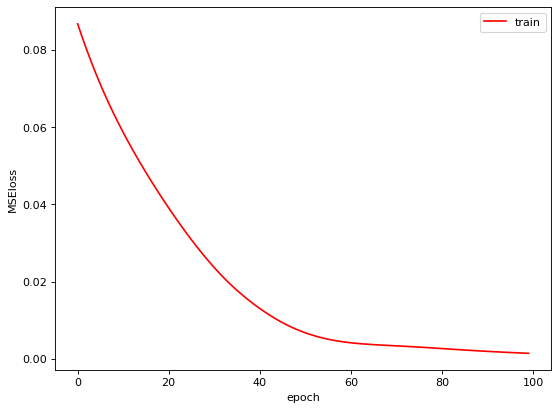

In [17]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [18]:
output, hidden = model(Variable(torch.from_numpy(test_real).float()))
output

tensor([[-0.0019,  0.0207,  0.0235,  0.0494],
        [-0.0017,  0.0208,  0.0236,  0.0496],
        [-0.0014,  0.0209,  0.0238,  0.0497],
        ...,
        [ 0.8165,  0.4772,  0.5079,  0.3171],
        [ 0.8171,  0.4779,  0.5092,  0.3152],
        [ 0.8118,  0.4798,  0.5074,  0.3098]], grad_fn=<SliceBackward0>)

In [19]:
prediction = scaler.inverse_transform(output.detach().numpy())
prediction

array([[  89.290344,  195.71281 ,  210.43628 ,  325.68027 ],
       [  90.34239 ,  195.98317 ,  210.93102 ,  326.4473  ],
       [  91.4235  ,  196.55142 ,  211.76935 ,  327.02292 ],
       ...,
       [3934.233   , 2344.256   , 2496.2683  , 1580.1846  ],
       [3937.0063  , 2347.167   , 2502.5576  , 1571.2549  ],
       [3912.151   , 2356.4216  , 2493.9163  , 1546.0166  ]],
      dtype=float32)

In [20]:
def calculate_prediction_error(predicted, actual):
    return abs(predicted - actual)/actual

In [21]:
actual = np.concatenate( (test_label[:, :, 0], test_label[:, :, 1], test_label[:, :, 2], test_label[:, :, 3]), axis = 1)
actual = scaler.inverse_transform(actual)
actual

array([[ 128.869995  ,  128.45106117,  130.74671332,  126.32417518],
       [ 128.399994  ,  129.30250546,  131.90177397,  125.35676108],
       [ 129.25      ,  130.45444535,  130.92749933,  126.29425619],
       ...,
       [4504.08      , 4425.95052648, 4421.99018921, 4455.41804922],
       [4418.64      , 4408.95181177, 4491.69595251, 4459.34754163],
       [4401.67      , 4478.4692426 , 4495.65331141, 4364.85023039]])

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

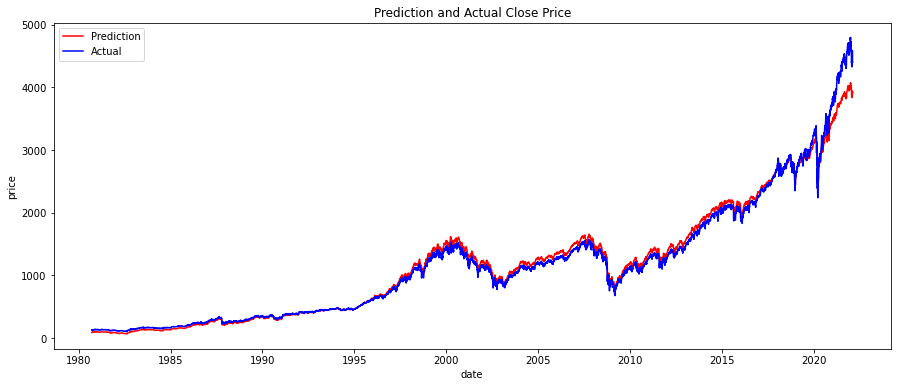

In [22]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 0], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Close Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

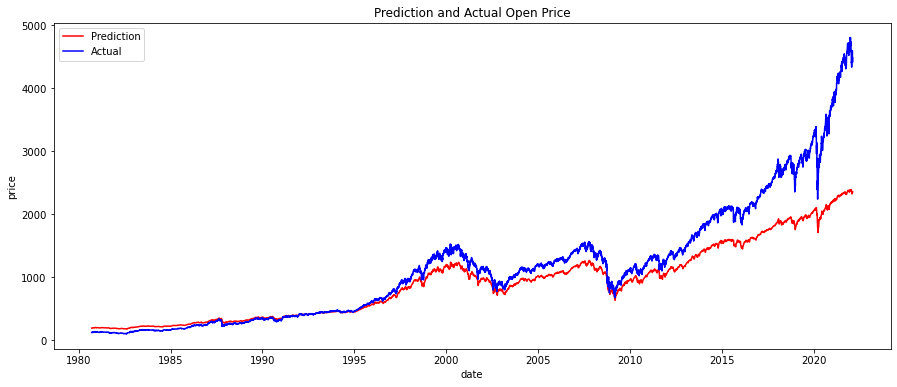

In [23]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 1], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 1], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Open Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

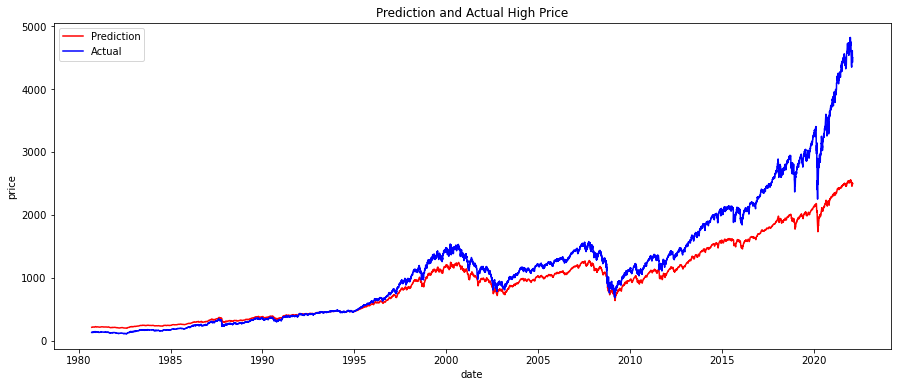

In [24]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 2], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 2], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual High Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

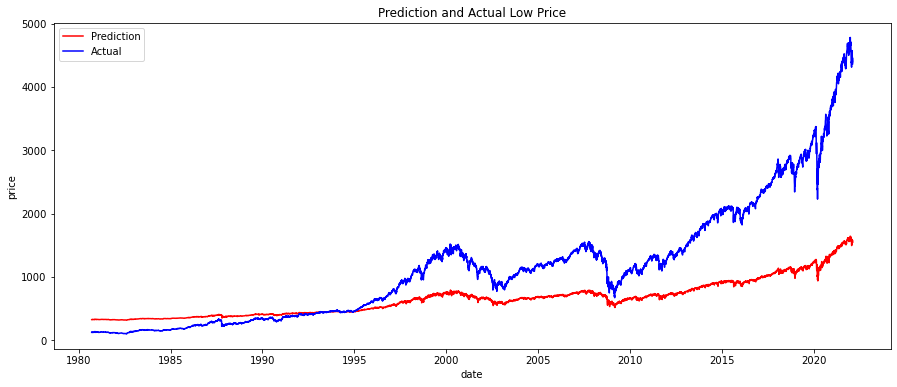

In [25]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 3], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 3], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Low Price")
plt.legend()
plt

In [26]:
error = calculate_prediction_error(prediction, actual)
error.shape

(10442, 4)

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

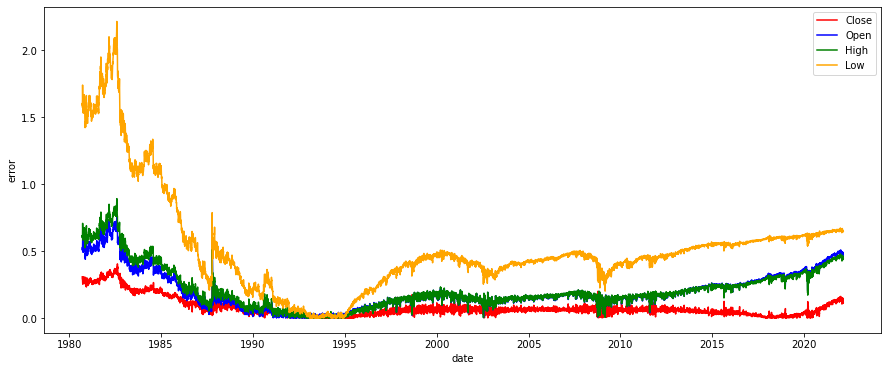

In [27]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], error[:, 0], 'red', label = 'Close')
plt.plot(test_date_list[:, 0], error[:, 1], 'blue', label = 'Open')
plt.plot(test_date_list[:, 0], error[:, 2], 'green', label = 'High')
plt.plot(test_date_list[:, 0], error[:, 3], 'orange', label = 'Low')

plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("error")
plt.legend()
plt

In [28]:
# """

# validation ｜ 把training dataset 分成 80% 20%，其中20%用来做validation dataset

# """


real_val_list = []
label_val_list = []
real_train_list_new = []
label_train_list_new = []
date_train_list_new = []
date_val_list = []



for i in range(real_train_list.shape[0]):
    if i % real_train_list.shape[0] <= real_train_list.shape[0] * 0.8:
        real_train_list_new.append(real_train_list[i,])
        label_train_list_new.append(label_train_list[i,])
        date_train_list_new.append(date_train_list[i,])
    else:
        real_val_list.append(real_train_list[i,])
        label_val_list.append(label_train_list[i,])
        date_val_list.append(date_train_list[i,])
real_train_list_new = np.array(real_train_list_new)
label_train_list_new = np.array(label_train_list_new)
real_val_list = np.array(real_val_list)
label_val_list = np.array(label_val_list)
date_train_list_new = np.array(date_train_list_new)
date_val_list = np.array(date_val_list)
print("real_train_list_new: " , real_train_list_new.shape)
print("label_train_list_new: " , label_train_list_new.shape)
print("real_val_list: " , real_val_list.shape)
print("label_val_list: " , label_val_list.shape)
print("date_train_list_new: " , date_train_list_new.shape)
print("date_val_list: " , date_val_list.shape)

# """
# real_train_list_new:  (9893, 180, 4)
# 9893:batch size
# 180: seq length
# 4: feature
# """

real_train_list_new:  (9893, 180, 4)
label_train_list_new:  (9893, 1, 4)
real_val_list:  (2473, 180, 4)
label_val_list:  (2473, 1, 4)
date_train_list_new:  (9893, 1)
date_val_list:  (2473, 1)


In [29]:
model_val = RNN(input_size, output_size, hidden_size, num_layers)
optimizer = torch.optim.Adam(model_val.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

loss_arr = []
loss_val_arr = []

for epoch in range(num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(real_train_list_new).float())
    labels = Variable(torch.from_numpy(label_train_list_new).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = model_val(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
       
    #loss for validation
    inputs_val = torch.from_numpy(real_val_list).float()
    labels_val = torch.from_numpy(label_val_list).float()
    output_val, hidden_val = model_val(inputs_val)
    loss_val = criterion(output_val.reshape(-1), labels_val.view(-1))
    loss_val_arr.append(loss_val.item())
    
    if (epoch % 10 == 0 or epoch == num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, num_epochs, loss.item()))
        print("[%d/%d] Loss_Val: %.4f" % (epoch, num_epochs, loss_val.item()))
    
    # Update parameters
    optimizer.step()                                

[0/100] Loss: 0.0152
[0/100] Loss_Val: 0.0632
[10/100] Loss: 0.0046
[10/100] Loss_Val: 0.0442
[20/100] Loss: 0.0032
[20/100] Loss_Val: 0.0284
[30/100] Loss: 0.0027
[30/100] Loss_Val: 0.0265
[40/100] Loss: 0.0020
[40/100] Loss_Val: 0.0223
[50/100] Loss: 0.0014
[50/100] Loss_Val: 0.0157
[60/100] Loss: 0.0008
[60/100] Loss_Val: 0.0100
[70/100] Loss: 0.0003
[70/100] Loss_Val: 0.0043
[80/100] Loss: 0.0001
[80/100] Loss_Val: 0.0013
[90/100] Loss: 0.0001
[90/100] Loss_Val: 0.0006
[99/100] Loss: 0.0000
[99/100] Loss_Val: 0.0005


<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

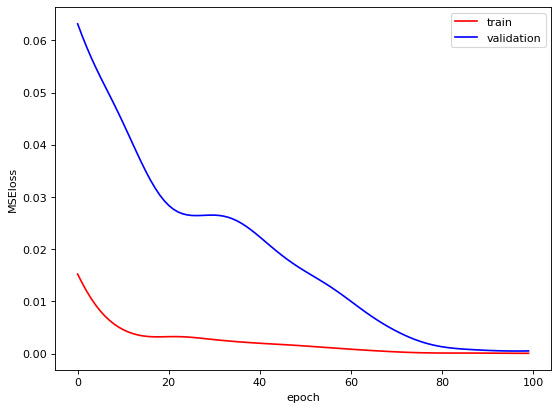

In [30]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.plot(np.array(loss_val_arr), 'b', label = 'validation')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [31]:
output_val, hidden = model_val(Variable(torch.from_numpy(test_real).float()))
output_val

tensor([[4.9457e-04, 4.3759e-03, 3.9904e-03, 2.9065e-03],
        [7.3935e-04, 4.5222e-03, 4.1910e-03, 3.1174e-03],
        [9.7945e-04, 4.8062e-03, 4.4656e-03, 3.3113e-03],
        ...,
        [5.9278e-01, 4.3399e-01, 4.1385e-01, 5.0651e-01],
        [5.9268e-01, 4.3247e-01, 4.1782e-01, 5.0458e-01],
        [5.8895e-01, 4.2976e-01, 4.1820e-01, 5.0200e-01]],
       grad_fn=<SliceBackward0>)

In [32]:
prediction_val = scaler.inverse_transform(output_val.detach().numpy())
prediction_val

array([[ 100.54366 ,  118.814415,  118.41092 ,  107.84918 ],
       [ 101.69372 ,  119.5027  ,  119.35763 ,  108.83754 ],
       [ 102.82178 ,  120.839325,  120.65333 ,  109.74623 ],
       ...,
       [2883.312   , 2140.706   , 2052.5488  , 2467.6235  ],
       [2882.8113  , 2133.564   , 2071.2693  , 2458.5935  ],
       [2865.3198  , 2120.785   , 2073.08    , 2446.511   ]],
      dtype=float32)

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

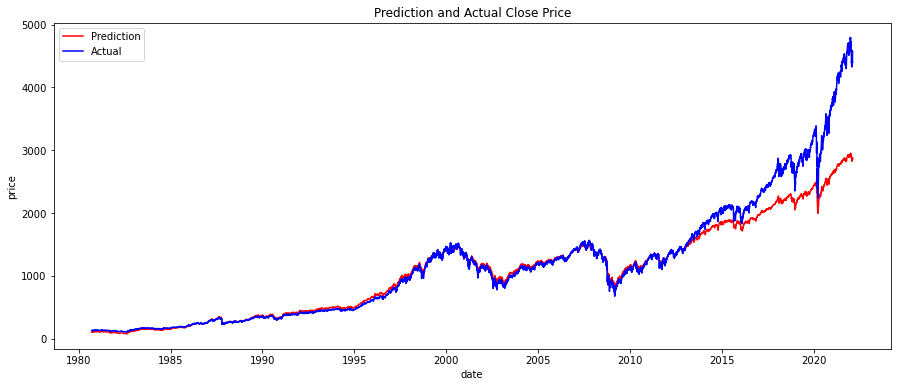

In [33]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 0], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Close Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

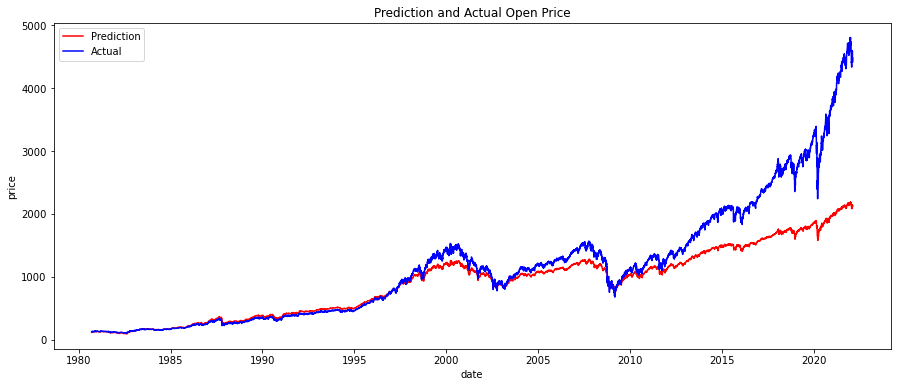

In [34]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 1], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 1], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Open Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

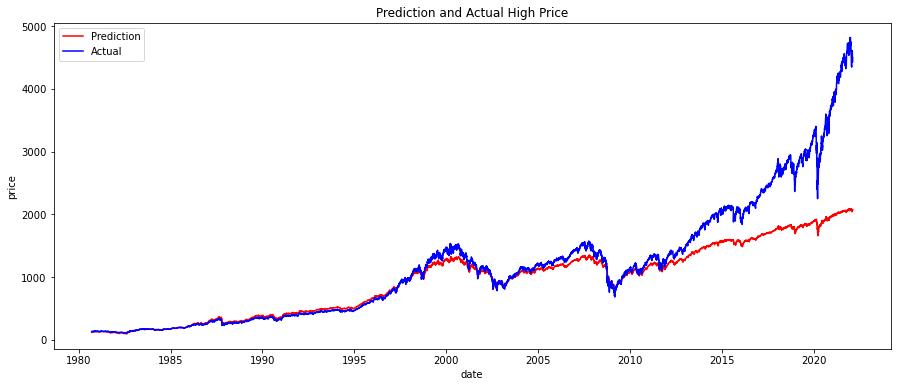

In [35]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 2], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 2], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual High Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

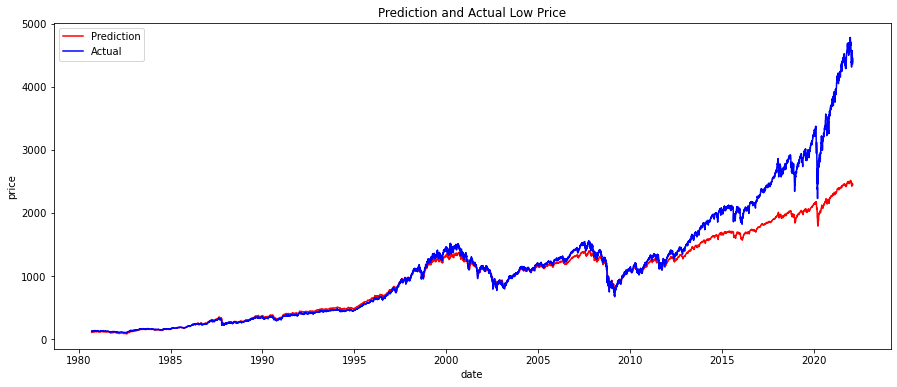

In [36]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 3], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 3], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Low Price")
plt.legend()
plt

In [37]:
error_val = calculate_prediction_error(prediction_val, actual)
error_val

array([[0.21980549, 0.07502193, 0.09434879, 0.14625065],
       [0.20799281, 0.07578975, 0.09510218, 0.13177767],
       [0.20447368, 0.07370481, 0.07847222, 0.13102754],
       ...,
       [0.35984441, 0.51632852, 0.53583144, 0.44615219],
       [0.34757951, 0.51608363, 0.53886699, 0.4486652 ],
       [0.34903802, 0.5264487 , 0.53887012, 0.43949715]])

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

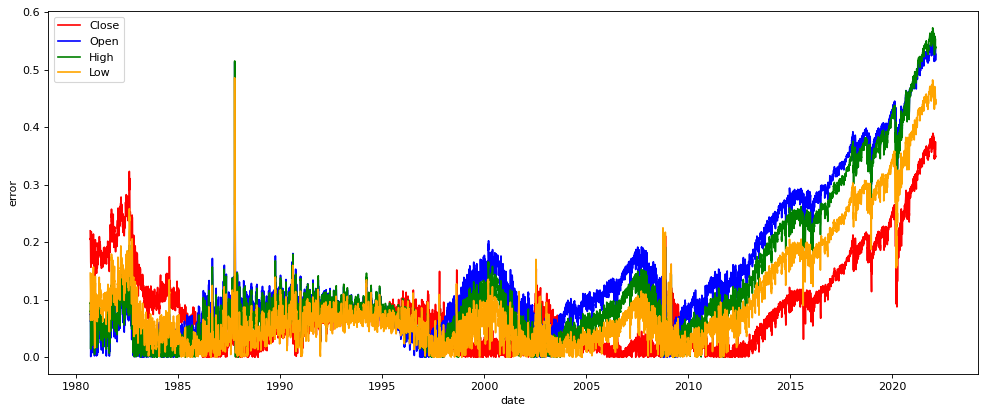

In [38]:
plt.figure(figsize=[15,6], dpi=80)
plt.plot(test_date_list[:, 0], error_val[:, 0], 'red', label = 'Close')
plt.plot(test_date_list[:, 0],error_val[:, 1], 'blue', label = 'Open')
plt.plot(test_date_list[:, 0],error_val[:, 2], 'green', label = 'High')
plt.plot(test_date_list[:, 0],error_val[:, 3], 'orange', label = 'Low')
plt.xlabel("date")
plt.ylabel("error")
plt.legend()
plt

In [39]:
def add_gaussian_noise(dataset, std_dev):
    dataset_reshape = dataset.reshape(dataset.shape[0] * dataset.shape[1] * dataset.shape[2], 1)
    noise = np.random.normal(0, std_dev, int(len(dataset_reshape) * 0.2))
    # Add the noise to image
    gp = np.random.uniform(0, dataset.shape[0] * dataset.shape[1] * dataset.shape[2], int(len(dataset_reshape) * 0.2))
    for i in range(int(len(dataset_reshape) * 0.2)):
        if dataset_reshape[int(gp[i])]==1:
            dataset_reshape[int(gp[i])]-=abs(noise[i])
        else:
            dataset_reshape[int(gp[i])]+=abs(noise[i])
    #gaussian_out = img + noise
    # Make the value between 0 and 1
    dataset_reshape = dataset_reshape.reshape(dataset.shape[0], dataset.shape[1], dataset.shape[2])
    gaussian_out = np.clip(dataset_reshape, 0.00000001, 1)
    return gaussian_out

In [40]:
std_dev = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
gaussian_error_array = np.zeros([len(std_dev), test_real.shape[0], test_real.shape[2]])
for i in range(len(std_dev)):
    gaussian_real_test = add_gaussian_noise(test_real, std_dev[i])
    gaussian_label_test = add_gaussian_noise(test_label, std_dev[i])
#     gaussian_output = model(gaussian_real_test)
    gaussian_output, hidden = model_val(Variable(torch.from_numpy(gaussian_real_test).float()))
    gaussian_prediction = scaler.inverse_transform(gaussian_output.detach().numpy())
    gaussian_actual = np.concatenate( (gaussian_label_test[:, :, 0], gaussian_label_test[:, :, 1], gaussian_label_test[:, :, 2], gaussian_label_test[:, :, 3]), axis = 1)
    gaussian_actual = scaler.inverse_transform(gaussian_actual)
    gaussian_error = calculate_prediction_error(gaussian_prediction, gaussian_actual)
    gaussian_error_array[i] = gaussian_error
gaussian_error_array

array([[[0.20896899, 0.10226515, 0.08725488, 0.13616487],
        [0.19871817, 0.0662821 , 0.08558182, 0.12212705],
        [0.19223849, 0.07563966, 0.05871501, 0.11758898],
        ...,
        [0.3598359 , 0.51630243, 0.53619113, 0.44615044],
        [0.34829284, 0.51596424, 0.53879383, 0.44866224],
        [0.34896142, 0.5262434 , 0.53875217, 0.44003721]],

       [[0.20665223, 0.1006294 , 0.16361379, 0.13382237],
        [0.18985357, 0.06610149, 0.12750352, 0.11395524],
        [0.28736069, 0.12275847, 0.06603413, 0.11467427],
        ...,
        [0.35967735, 0.51809759, 0.53600925, 0.44613624],
        [0.34828964, 0.51599032, 0.54067404, 0.44865271],
        [0.35084118, 0.52630424, 0.53877405, 0.44002391]],

       [[0.14220352, 0.03262651, 0.10614934, 0.066074  ],
        [0.16941862, 0.04656873, 0.10642906, 0.09999009],
        [0.25117236, 0.07322638, 0.01319693, 0.07556167],
        ...,
        [0.35954368, 0.51811876, 0.53620702, 0.44595657],
        [0.34829074, 0.515991

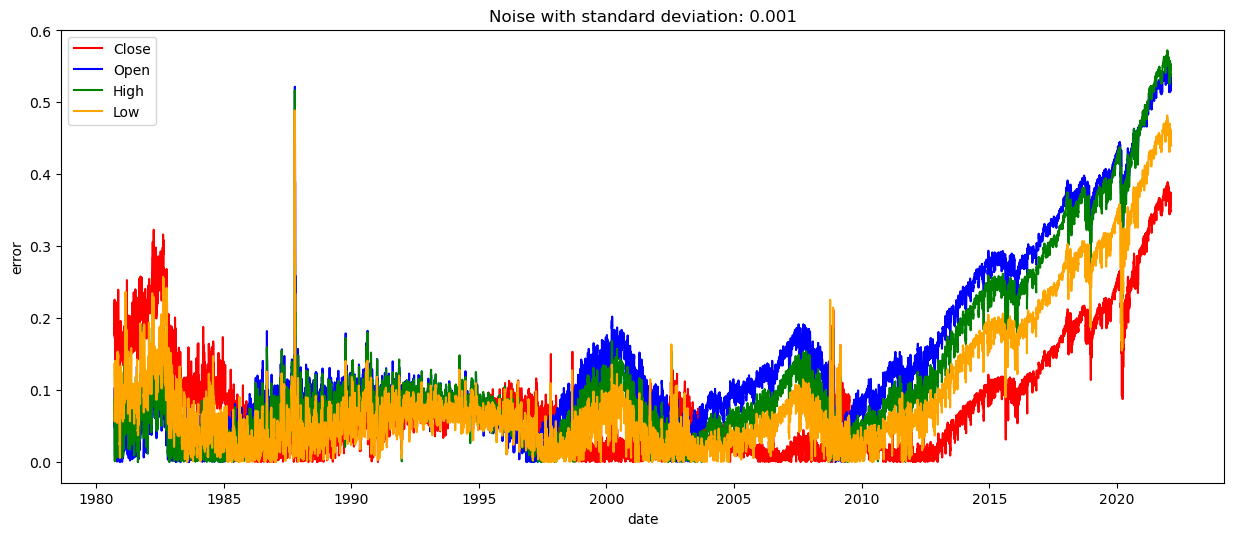

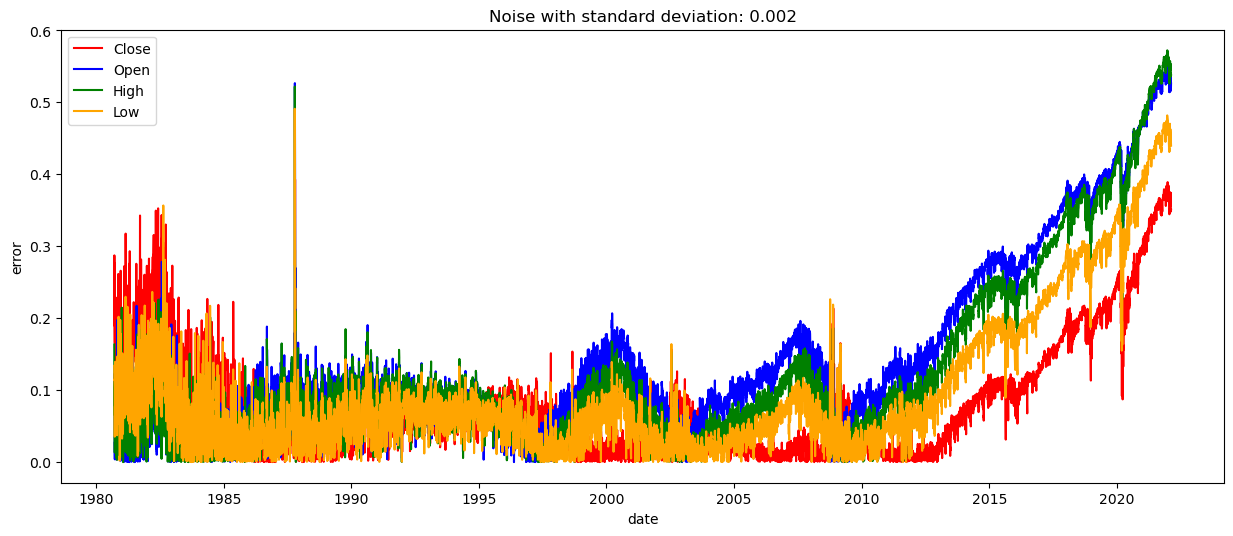

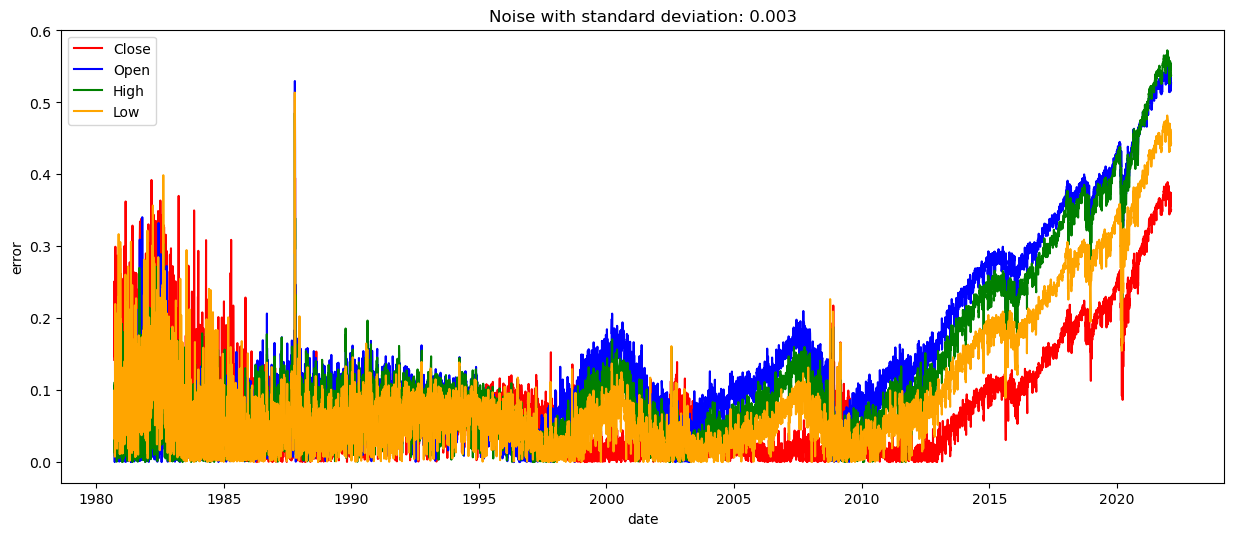

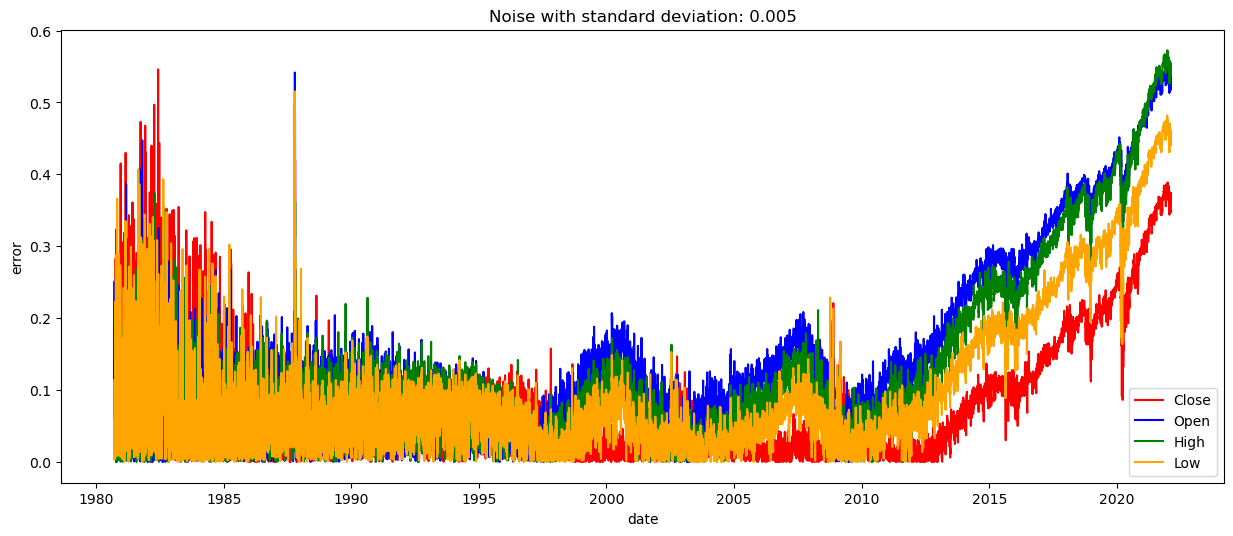

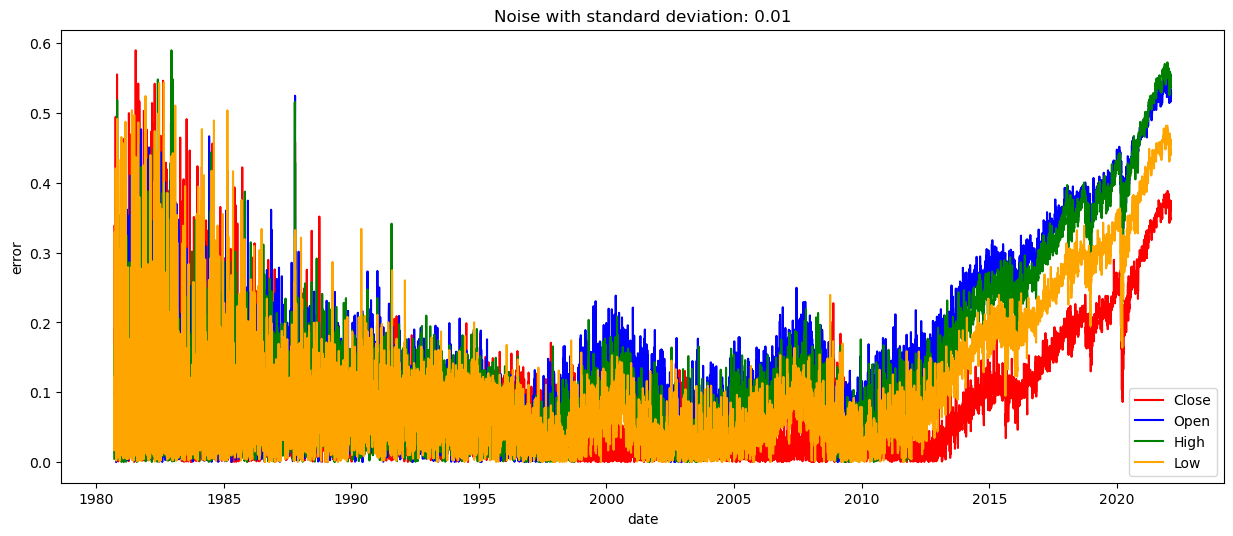

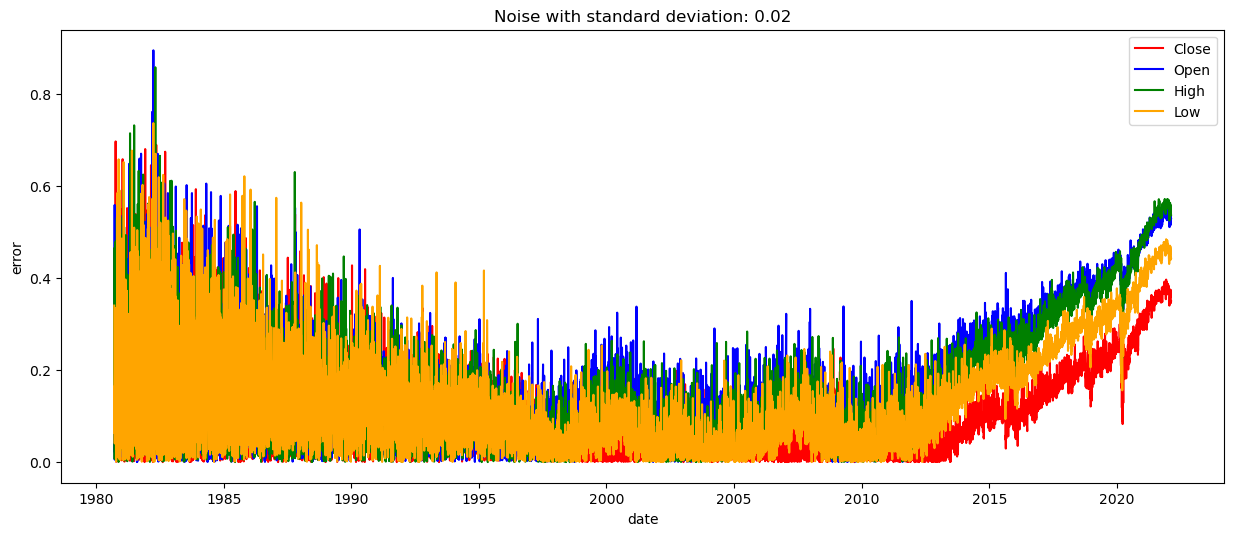

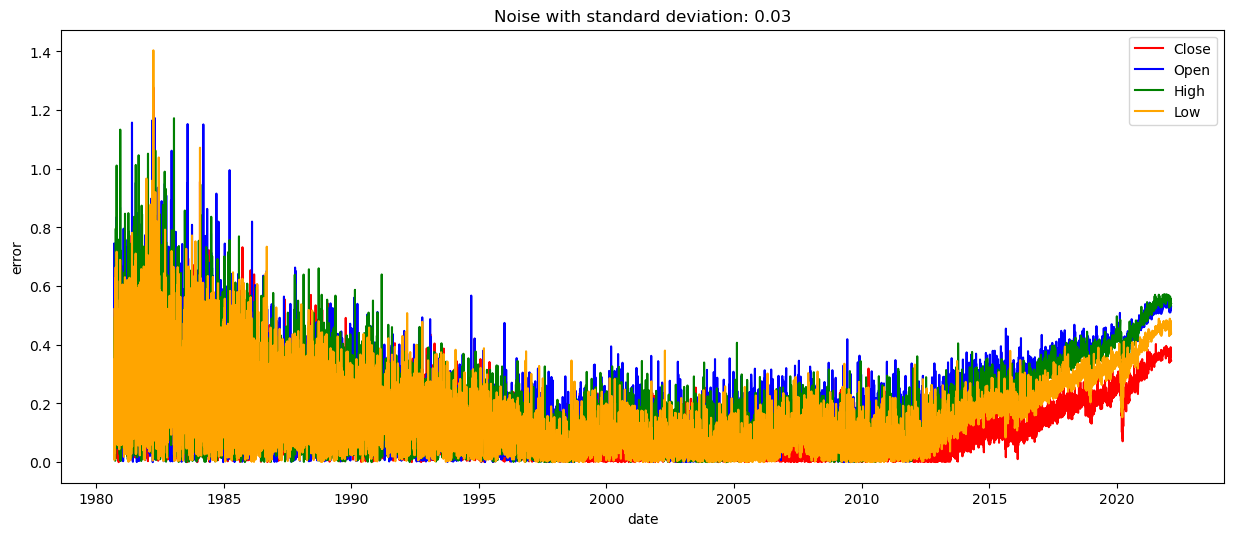

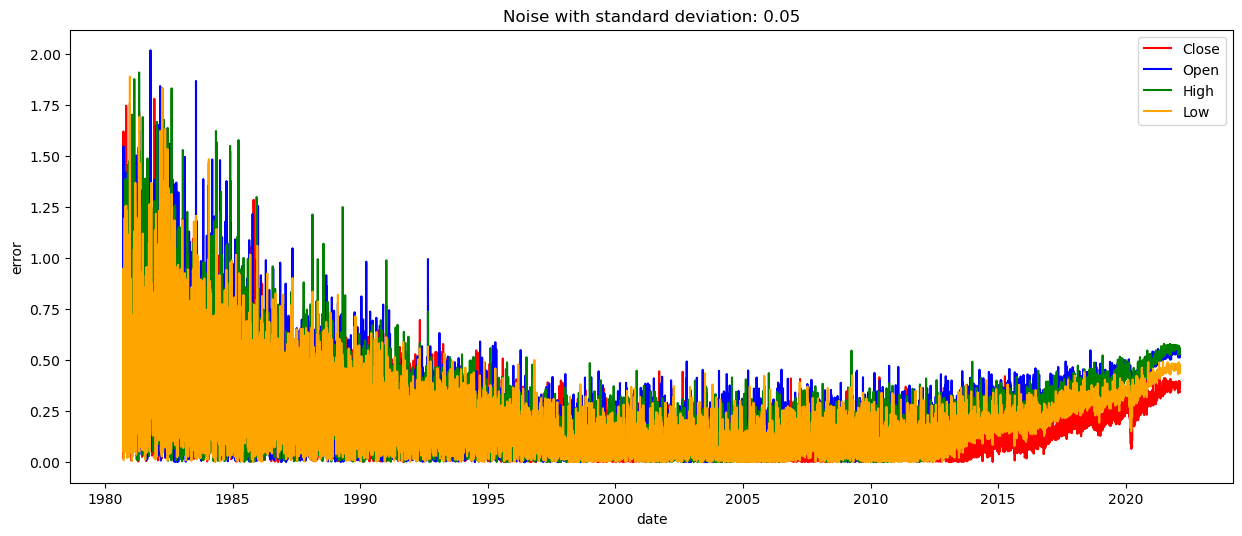

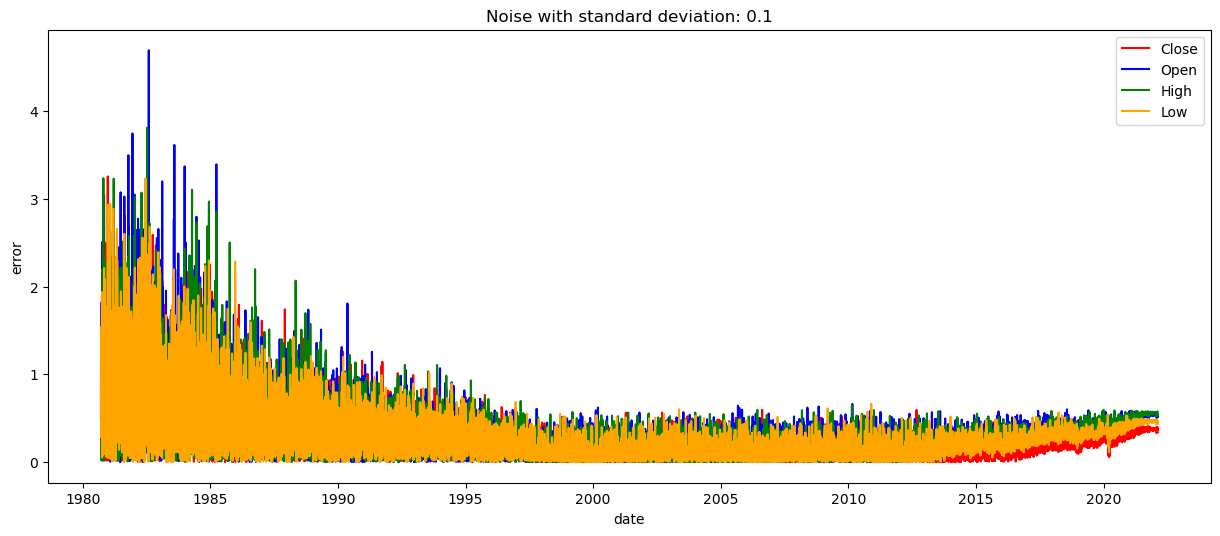

In [41]:
for i in range(len(std_dev)):
    plt.figure(figsize=[15,6], dpi=100)
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 0], 'red', label = 'Close')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 1], 'blue', label = 'Open')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 2], 'green', label = 'High')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 3], 'orange', label = 'Low')
    plt.xlabel("date")
    plt.ylabel("error")
    plt.legend()
    plt.title("Noise with standard deviation: " + str(std_dev[i]))
    plt.show()